In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import joblib

In [4]:
dataSet = pd.read_csv('dataset_clean.csv')
df = pd.DataFrame(dataSet)
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

print (df['Tanggal'])


0      2022-01-01
1      2022-01-02
2      2022-01-03
3      2022-01-04
4      2022-01-05
          ...    
999    2024-09-26
1000   2024-09-27
1001   2024-09-28
1002   2024-09-29
1003   2024-09-30
Name: Tanggal, Length: 1004, dtype: datetime64[ns]


In [5]:
# Memisahkan Input dan Output
input_features = ['BawangMerah', 'BawangPutihBonggol', 'BerasMedium', 'BerasPremium', 'CabaiMerahKeriting', 'CabaiRawitMerah', 'DagingAyamRas', 'DagingSapiMurni', 'GulaKonsumsi', 'MinyakGorengKemasanSederhana', 'TelurAyamRas']
output_features = ['BawangMerah', 'BawangPutihBonggol', 'BerasMedium', 'BerasPremium', 'CabaiMerahKeriting', 'CabaiRawitMerah', 'DagingAyamRas', 'DagingSapiMurni', 'GulaKonsumsi', 'MinyakGorengKemasanSederhana', 'TelurAyamRas']

In [6]:
x = df[input_features].values
y = df[output_features].values

print(df['Tanggal'])

0      2022-01-01
1      2022-01-02
2      2022-01-03
3      2022-01-04
4      2022-01-05
          ...    
999    2024-09-26
1000   2024-09-27
1001   2024-09-28
1002   2024-09-29
1003   2024-09-30
Name: Tanggal, Length: 1004, dtype: datetime64[ns]


In [7]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

In [8]:
print(x_scaled)

[[0.11126601 0.17219008 0.0461207  ... 0.00473597 0.23730069 0.651506  ]
 [0.11512673 0.17091226 0.04748064 ... 0.00266398 0.24837731 0.66374857]
 [0.10955604 0.16764672 0.04556072 ... 0.00645276 0.24587272 0.63832428]
 ...
 [0.12963483 0.75143656 0.79480875 ... 0.89989344 0.10610978 0.58368552]
 [0.1310408  0.75143656 0.79968855 ... 0.8908951  0.1119303  0.59176897]
 [0.12984003 0.75511226 0.79408878 ... 0.90320862 0.11009595 0.59015899]]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=False)

In [10]:
timesteps = 30 #data 30 hari untuk input
n_features_input = len(input_features)
n_features_output = len(output_features)

In [11]:
def create_sequences(x,y, time_steps) :
  x_seq, y_seq = [], []

  for i in range(len(x) - time_steps) :
    x_seq.append(x[i:i+timesteps])
    y_seq.append(y[i+timesteps])

  return np.array(x_seq), np.array(y_seq)

In [12]:
x_train_seq, y_train_seq = create_sequences(x_train, y_train, timesteps)
x_test_seq, y_test_seq = create_sequences(x_test, y_test, timesteps)

# dates_test_seq = dates_test_full[timesteps:]

In [13]:
model = Sequential()
model.add(LSTM(60, input_shape=(timesteps, n_features_input), return_sequences=True))
# model.add(Dropout(0.2)) #jika dibutuhkan untuk mencegah terjadinya Overfitting
model.add(LSTM(60))
model.add(Dense(n_features_output))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [15]:
hist = model.fit(x_train_seq, y_train_seq, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2438
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0785
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0522
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0440
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0361
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0342
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0304
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0289
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0261
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0256
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0237
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0246
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0226
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0216
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - lo

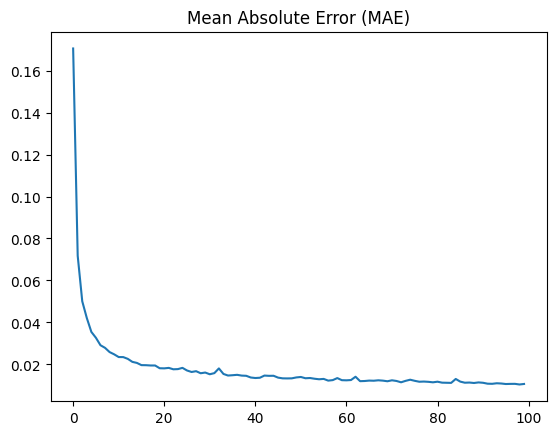

In [16]:
model_history = hist.history
loss = model_history['loss']

plt.figure()
plt.plot(loss, label='Loss')
plt.title('Mean Absolute Error (MAE)')
plt.show()

In [17]:
predictions = model.predict(x_test_seq)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [18]:
predictions = scaler.inverse_transform(predictions)


In [19]:
y_test_asli = scaler.inverse_transform(y_test_seq)

In [20]:
mae = np.mean(np.abs(predictions - y_test_asli), axis=0)

In [21]:
for i, features in enumerate(output_features):
    print(f"MAE for {features}: {mae[i]}")

MAE for BawangMerah: 2224.9838559247078
MAE for BawangPutihBonggol: 1095.1655444078947
MAE for BerasMedium: 84.61172868421059
MAE for BerasPremium: 111.94905564510222
MAE for CabaiMerahKeriting: 3925.329641345028
MAE for CabaiRawitMerah: 2953.445321769006
MAE for DagingAyamRas: 751.9470323099415
MAE for DagingSapiMurni: 766.2504423976608
MAE for GulaKonsumsi: 426.1757144736842
MAE for MinyakGorengKemasanSederhana: 101.95502304824551
MAE for TelurAyamRas: 294.5546350548247


In [22]:
threshold_mae_BawangMerah = (df['BawangMerah'].max() - df['BawangMerah'].min()) * 10/100
threshold_mae_BawangPutihBonggol = (df['BawangPutihBonggol'].max() - df['BawangPutihBonggol'].min()) * 10/100
threshold_mae_BerasMedium = (df['BerasMedium'].max() - df['BerasMedium'].min()) * 10/100
threshold_mae_BerasPremium = (df['BerasPremium'].max() - df['BerasPremium'].min()) * 10/100
threshold_mae_CabaiMerahKeriting = (df['CabaiMerahKeriting'].max() - df['CabaiMerahKeriting'].min()) * 10/100
threshold_mae_CabaiRawitMerah = (df['CabaiRawitMerah'].max() - df['CabaiRawitMerah'].min()) * 10/100
threshold_mae_DagingAyamRas = (df['DagingAyamRas'].max() - df['DagingAyamRas'].min()) * 10/100
threshold_mae_DagingSapiMurni = (df['DagingSapiMurni'].max() - df['DagingSapiMurni'].min()) * 10/100
threshold_mae_GulaKonsumsi = (df['GulaKonsumsi'].max() - df['GulaKonsumsi'].min()) * 10/100
threshold_mae_MinyakGorengKemasanSederhana = (df['MinyakGorengKemasanSederhana'].max() - df['MinyakGorengKemasanSederhana'].min()) * 10/100
threshold_mae_TelurAyamRas = (df['TelurAyamRas'].max() - df['TelurAyamRas'].min()) * 10/100

print("threshold_mae_BawangMerah :", threshold_mae_BawangMerah)
print("threshold_mae_BawangPutihBonggol :", threshold_mae_BawangPutihBonggol)
print("threshold_mae_BerasMedium :", threshold_mae_BerasMedium)
print("threshold_mae_BerasPremium :", threshold_mae_BerasPremium)
print("threshold_mae_CabaiMerahKeriting :", threshold_mae_CabaiMerahKeriting)
print("threshold_mae_CabaiRawitMerah :", threshold_mae_CabaiRawitMerah)
print("threshold_mae_DagingAyamRas :", threshold_mae_DagingAyamRas)
print("threshold_mae_DagingSapiMurni :", threshold_mae_DagingSapiMurni)
print("threshold_mae_GulaKonsumsi :", threshold_mae_GulaKonsumsi)
print("threshold_mae_MinyakGorengKemasanSederhana :", threshold_mae_MinyakGorengKemasanSederhana)
print("threshold_mae_TelurAyamRas :", threshold_mae_TelurAyamRas)

threshold_mae_BawangMerah : 3870.047917
threshold_mae_BawangPutihBonggol : 1864.389706
threshold_mae_BerasMedium : 367.662745
threshold_mae_BerasPremium : 427.8583879999998
threshold_mae_CabaiMerahKeriting : 4581.868627
threshold_mae_CabaiRawitMerah : 5564.1857279999995
threshold_mae_DagingAyamRas : 751.5882349999999
threshold_mae_DagingSapiMurni : 2058.67647
threshold_mae_GulaKonsumsi : 496.82353
threshold_mae_MinyakGorengKemasanSederhana : 833.764706
threshold_mae_TelurAyamRas : 876.8823530000002


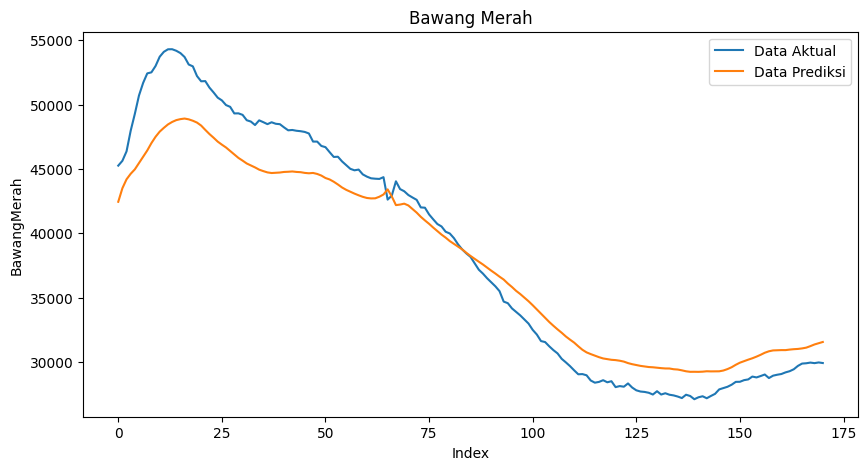

In [23]:
target_index = 0

plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:,target_index], label ="Data Aktual")
plt.plot(predictions[:,target_index], label ="Data Prediksi")
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Bawang Merah")
plt.legend()
plt.show()


# target_index = 0

# plt.figure(figsize=(10, 5))
# # Use the adjusted dates for the x-axis
# plt.plot(dates_test_seq, y_test_asli[:,target_index], label ="Data Aktual")
# plt.plot(dates_test_seq, predictions[:,target_index], label ="Data Prediksi")
# plt.xlabel("Tanggal") # Change the label to reflect that the x-axis is now date
# plt.ylabel(output_features[target_index])
# plt.title(output_features[target_index]) # Use the actual feature name
# plt.legend()
# plt.show()


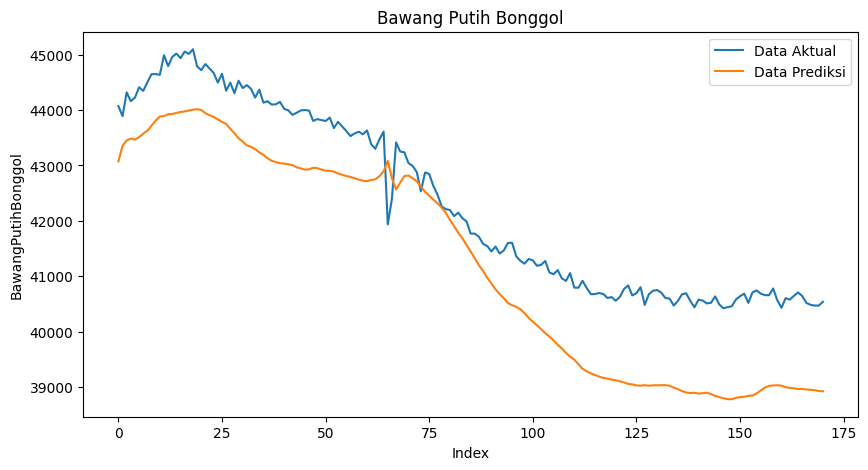

In [24]:
target_index = 1

plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:,target_index], label ="Data Aktual")
plt.plot(predictions[:,target_index], label ="Data Prediksi")
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Bawang Putih Bonggol")
plt.legend()
plt.show()


# target_index = 2

# plt.figure(figsize=(10, 5))
# # Use the adjusted dates for the x-axis
# plt.plot(dates_test_seq, y_test_asli[:,target_index], label ="Data Aktual")
# plt.plot(dates_test_seq, predictions[:,target_index], label ="Data Prediksi")
# plt.xlabel("Tanggal") # Change the label to reflect that the x-axis is now date
# plt.ylabel(output_features[target_index])
# plt.title(output_features[target_index]) # Use the actual feature name
# plt.legend()
# plt.show()

In [36]:
# Pilih satu fitur output yang ingin diprediksi
target_output_feature = 'BawangMerah'

# Temukan indeks dari fitur output yang dipilih
target_output_index = output_features.index(target_output_feature)

# Sesuaikan scaling untuk output (jika perlu, tetapi scaler yang ada bisa digunakan)
# Jika Anda ingin scaler yang spesifik untuk satu output, Anda perlu membuat scaler baru
# Misalnya: scaler_bawang_merah = MinMaxScaler().fit(df[[target_output_feature]].values)
# Namun, untuk saat ini kita akan tetap menggunakan scaler yang ada yang sudah fit pada semua output

# Sesuaikan model output (Opsional, jika ingin model yang hanya memprediksi 1 output)
# Jika model Anda sudah dilatih untuk banyak output, Anda bisa tetap menggunakannya
# dan hanya mengambil output yang diinginkan. Jika ingin melatih model baru khusus
# untuk 1 output, layer Dense terakhir perlu diubah:
# model_single_output = Sequential()
# model_single_output.add(LSTM(60, input_shape=(timesteps, n_features_input), return_sequences=True))
# model_single_output.add(LSTM(60))
# model_single_output.add(Dense(1)) # Hanya 1 unit untuk 1 output

# Karena model Anda sudah dilatih, kita akan menggunakan model yang sudah ada
# dan hanya mengambil output untuk fitur yang diinginkan.

# --- Bagian Prediksi (Multi-step forecasting) ---

# Ambil data historis terakhir sebanyak timesteps dari dataframe df
current_input_data = df[input_features].tail(timesteps).values

# Dapatkan tanggal terakhir dari dataframe df
last_date_in_df = df['Tanggal'].iloc[-1]

# Tentukan tanggal target untuk prediksi
tanggal_target_str = '2026-12-31' # Ganti dengan tanggal target yang diinginkan
tanggal_target = pd.to_datetime(tanggal_target_str)

# Inisialisasi list untuk menyimpan hasil prediksi di masa depan (hanya untuk fitur target)
future_predictions_single_feature = []
future_prediction_dates = [] # Untuk menyimpan tanggal prediksi

# Inisialisasi tanggal prediksi saat ini
current_predicted_date = last_date_in_df + timedelta(days=1)

print(f"Melakukan prediksi harga {target_output_feature} hingga tanggal {tanggal_target_str} dimulai dari tanggal setelah data terakhir ({last_date_in_df.strftime('%Y-%m-%d')})...")

# Lakukan prediksi iteratif hingga mencapai tanggal target
while current_predicted_date <= tanggal_target:
    # Pre-process current_input_data
    current_input_scaled = scaler.transform(current_input_data)
    current_input_seq = np.array([current_input_scaled])

    # Lakukan prediksi satu langkah ke depan
    next_step_prediction_scaled = model.predict(current_input_seq)

    # Ambil hasil prediksi hanya untuk fitur output yang ditargetkan
    next_step_prediction_single_feature_scaled = next_step_prediction_scaled[0, target_output_index].reshape(1, 1)

    # Inverse transform prediksi (gunakan scaler yang sama yang fit pada semua output)
    # Untuk inverse transform satu nilai, Anda perlu melakukan beberapa trik
    # karena scaler fit pada multi-dimensi. Cara yang umum adalah membuat array
    # dengan dimensi yang sesuai dan mengisi hanya nilai yang relevan.
    dummy_array = np.zeros((1, n_features_output))
    dummy_array[0, target_output_index] = next_step_prediction_scaled[0, target_output_index]
    next_step_prediction_asli_full = scaler.inverse_transform(dummy_array)
    next_step_prediction_asli_single_feature = next_step_prediction_asli_full[0, target_output_index]

    # Simpan hasil prediksi dan tanggalnya
    future_predictions_single_feature.append(next_step_prediction_asli_single_feature)
    future_prediction_dates.append(current_predicted_date)

    # Siapkan input untuk langkah berikutnya
    # Untuk input berikutnya, kita masih perlu menggunakan semua fitur input.
    # Bagian ini tetap sama. Kita mengganti data terlama dengan data terbaru (hasil prediksi).
    current_input_data = np.delete(current_input_data, 0, axis=0)
    # Tambahkan hasil prediksi untuk semua fitur output (karena ini yang akan menjadi input)
    # Jadi, meskipun kita hanya menampilkan 1 output, input untuk langkah selanjutnya
    # tetap menggunakan semua output yang diprediksi oleh model.
    current_input_data = np.vstack([current_input_data, next_step_prediction_asli_full[0]])

    # Tingkatkan tanggal prediksi
    current_predicted_date += timedelta(days=1)

# Tampilkan hasil prediksi
print(f"\nHasil Prediksi Harga {target_output_feature} untuk Hari-Hari Mendatang:")
for i in range(len(future_prediction_dates)):
    date = future_prediction_dates[i].strftime('%Y-%m-%d')
    price = future_predictions_single_feature[i]
    print(f"Tanggal: {date}, {target_output_feature}: {price:.2f}")

# Anda juga bisa membuat DataFrame hanya untuk fitur target
future_predictions_single_feature_df = pd.DataFrame({
    'Tanggal': future_prediction_dates,
    target_output_feature: future_predictions_single_feature
})
print(f"\nHasil Prediksi {target_output_feature} dalam bentuk DataFrame:")
print(future_predictions_single_feature_df)

Melakukan prediksi harga BawangMerah hingga tanggal 2026-12-31 dimulai dari tanggal setelah data terakhir (2024-09-30)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 